In [1]:

# normal 
import pandas as pd


# imports 
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

# Geo-location stuffs
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [2]:
#!conda install -c conda-forge geojson

---

In [3]:
# loads in crash data

df = pd.read_csv('./data/crash_features_2019.csv')

In [4]:
df = gpd.GeoDataFrame(df, geometry = gpd.points_from_xy(df.LONGITUDE, df.LATITUDE))

In [5]:
# Creates sample crash data

#df = df.sample(2_000)

In [5]:
"""
    Creating Reduced Columns 

"""

# list of columns names

columns_names = list(df.columns)

#removing names of columns you want to KEEP

columns_names.remove('ZIP CODE')
columns_names.remove('BOROUGH')
columns_names.remove('LATITUDE')
columns_names.remove('LOCATION')
columns_names.remove('LONGITUDE')
columns_names.remove('CONTRIBUTING FACTOR VEHICLE 1')
columns_names.remove('CRASH TIME')
columns_names.remove('CRASH DATE')
columns_names.remove('date')
columns_names.remove('geometry')

#dropping the rest of the list 

df = df.drop(columns = columns_names, axis = 1)

In [6]:
df.head(2)

,date,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,CONTRIBUTING FACTOR VEHICLE 1,geometry
0,2019-01-01,01/01/2019,1:10,MANHATTAN,10011.0,40.737360,-73.996850,"(40.73736, -73.99685)",Driver Inattention/Distraction,POINT (-73.99685 40.73736)
1,2019-01-01,01/01/2019,15:00,BRONX,10466.0,40.892624,-73.859924,"(40.892624, -73.859924)",Other Vehicular,POINT (-73.85992 40.89262)


In [7]:
type(df)

geopandas.geodataframe.GeoDataFrame

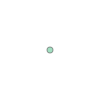

In [8]:
df.iloc[0,-1]

---

## Geo Data

#### Neighborhood polygon

In [9]:
# loads neighboorhood data

neighborhoods = gpd.read_file('./neighborhoods/d085e2f8d0b54d4590b1e7d1f35594c1pediacitiesnycneighborhoods.geojson.json')

In [10]:
# checks shape of data

neighborhoods.shape

(310, 5)

In [11]:
# looks at all brooklyn neighborhoods

neighborhoods[neighborhoods['borough'] == 'Brooklyn']

,neighborhood,boroughCode,borough,@id,geometry
7,Bath Beach,3,Brooklyn,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-73.99381 40.60195, -73.99962 40.596..."
9,Bay Ridge,3,Brooklyn,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-74.01475 40.63397, -74.01475 40.633..."
16,Bedford-Stuyvesant,3,Brooklyn,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-73.94115 40.70028, -73.90548 40.680..."
20,Bensonhurst,3,Brooklyn,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-73.97300 40.60883, -73.97299 40.608..."
21,Bergen Beach,3,Brooklyn,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-73.91732 40.63101, -73.90396 40.624..."
...,...,...,...,...,...
270,South Slope,3,Brooklyn,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-73.97686 40.66461, -73.97685 40.664..."
278,Sunset Park,3,Brooklyn,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-73.99280 40.66553, -73.99300 40.665..."
293,Vinegar Hill,3,Brooklyn,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-73.97905 40.70597, -73.97906 40.705..."
303,Williamsburg,4,Brooklyn,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-73.95757 40.72510, -73.95300 40.722..."


In [12]:
# Geo location  polygon for Astoria queens

astoria =  neighborhoods[neighborhoods['neighborhood'] == 'Astoria']
astoria

,neighborhood,boroughCode,borough,@id,geometry
6,Astoria,4,Queens,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-73.90160 40.76777, -73.90270 40.766..."


In [13]:
astoria['geometry']

6    POLYGON ((-73.90160 40.76777, -73.90270 40.766...
Name: geometry, dtype: geometry

In [14]:
#df['CRASH TIME'].splt(:)

In [15]:
# Hospitals 

# wrong gps locations going to update

#hospitals = gpd.read_file("./hospitals/nyu_2451_34494.shp")
#hospitals.crs = {'init': 'epsg:4326'}
#hospitals.head(2)

## Geo calculation stuffs

In [16]:
cords =  [(-74.000009, 40.763306),( -73.985957,40.757391),( -73.992627, 40.747933), (-74.006919,40.754636)]
lincoln_tunnel = Polygon(cords)

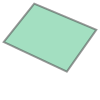

In [17]:
lincoln_tunnel

In [18]:
# apply the contains method to to polygon and points 
row_indices=[]
poly = lincoln_tunnel
for i, j in df.iterrows():
    if (poly.contains(j['geometry'])):
        row_indices.append(i)
    
print('number of crashes: ', len(row_indices))

number of crashes:  2555


In [19]:
lincoln_tunnel_crashes_2019=df[df.index.isin(row_indices)]
lincoln_tunnel_crashes_2019.head()

,date,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,CONTRIBUTING FACTOR VEHICLE 1,geometry
80,2019-01-01,01/01/2019,4:50,MANHATTAN,10001.0,40.751026,-73.996620,"(40.751026, -73.99662)",Unspecified,POINT (-73.99662 40.75103)
87,2019-01-01,01/01/2019,4:23,NaN,NaN,40.761500,-73.997826,"(40.7615, -73.997826)",Driver Inattention/Distraction,POINT (-73.99783 40.76150)
174,2019-01-01,01/01/2019,2:30,MANHATTAN,10001.0,40.749706,-73.991570,"(40.749706, -73.99157)",Passing or Lane Usage Improper,POINT (-73.99157 40.74971)
200,2019-01-01,01/01/2019,19:45,NaN,NaN,40.758533,-73.988850,"(40.758533, -73.98885)",Turning Improperly,POINT (-73.98885 40.75853)
333,2019-01-01,01/01/2019,19:03,MANHATTAN,10018.0,40.754055,-73.995830,"(40.754055, -73.99583)",Other Vehicular,POINT (-73.99583 40.75406)


In [20]:
lincoln_tunnel_crashes_2019.to_csv('./data/crashes_lincoln_tunnel.csv')

In [21]:
contributing_factor_1=lincoln_tunnel_crashes_2019['CONTRIBUTING FACTOR VEHICLE 1'].unique()
len(contributing_factor_1)

35

There are 35 unique factors that are listed as contributing factors for vehicle 1.

In [22]:
lincoln_tunnel_crashes_2019_contributing_factors=lincoln_tunnel_crashes_2019.groupby(by='CONTRIBUTING FACTOR VEHICLE 1').count()[['LOCATION']]
lincoln_tunnel_crashes_2019_contributing_factors.rename({'LOCATION':'COUNT OF CRASHES'},inplace=True)
lincoln_tunnel_crashes_2019_contributing_factors.sort_values(by='LOCATION',ascending=False,inplace=True)
lincoln_tunnel_crashes_2019_contributing_factors.head()

,LOCATION
CONTRIBUTING FACTOR VEHICLE 1,
Driver Inattention/Distraction,614
Unspecified,430
Passing or Lane Usage Improper,278
Following Too Closely,217
Passing Too Closely,208


Let's plot a horizontal barchart to show the number of crashes contributed by each factor.

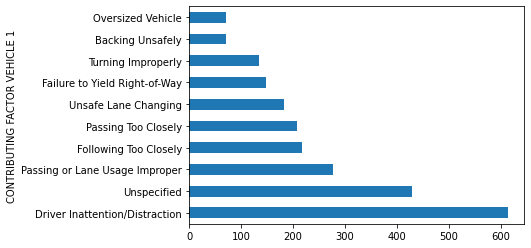

In [23]:
import matplotlib.pyplot as plt
ax=lincoln_tunnel_crashes_2019_contributing_factors.head(10).plot(kind='barh')
ax.get_legend().remove()
plt.savefig('top_contributing_factors_lincoln_tunnel.png')

### MAP test

In [ ]:
# map with dots that we can color code


m_1 = folium.Map(location=[40.734603, -73.9903599], tiles='cartodbpositron', zoom_start=10.5)

def color_producer(val):
    if val <= 12:
        return 'forestgreen'
    else:
        return 'darkred'

    
    
    
    
# Add a bubble map to the base map
for i in range(0,len(df)):
    Circle(
        location=[df.iloc[i]['LATITUDE'], df.iloc[i]['LONGITUDE']],
        radius=20,
        color='forestgreen').add_to(m_1) #df.iloc[i]['CRASH TIME'])

m_1


In [24]:
# Map that clusters the crashes 



# m_2 = folium.Map(location=[40.734603, -73.9903599], tiles='cartodbpositron', zoom_start=10.5)

# mc = MarkerCluster()
# for idx, row in lincoln_tunnel_crashes_2019.iterrows():
#     #if not math.isnan(row['Long']) and not math.isnan(row['Lat']):
#     mc.add_child(Marker([row['LATITUDE'], row['LONGITUDE']]))
# m_2.add_child(mc)

# for i in range(0,len(lincoln_tunnel_crashes_2019)):
#     Circle(
#         location=[lincoln_tunnel_crashes_2019.iloc[i]['LATITUDE'], lincoln_tunnel_crashes_2019.iloc[i]['LONGITUDE']],
#         radius=20,
#         color='forestgreen').add_to(m_2)

# m_2

In [25]:
m_2
plt.savefig('lincoln_tunnel_crashes.png')

<Figure size 432x288 with 0 Axes>